In [312]:
import pandas as pd
import numpy as np
%matplotlib inline

In [247]:
df = pd.read_csv('survey_results_public2.csv')
country_grp = df.groupby(['Country'])
ed_grp = df.groupby(['EdLevel'])
country_responders = df['Country'].value_counts() 

# 1.1 Συνολικά MainBranch απαντήσεις
##### αριθμός απαντήσεων - count 
##### ποσοστό απαντήσεων - percent

In [135]:
responders_MB = df['MainBranch'].value_counts()
responders_MB_per = df['MainBranch'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
MB_df = pd.concat([responders_MB, responders_MB_per], axis='columns', sort=False)
MB_df.columns = ['Count','Percent']
MB_df

,Count,Percent
I am a developer by profession,53507,73.0%
I am learning to code,6309,8.6%
"I am not primarily a developer, but I write code sometimes as part of my work",5794,7.9%
I code primarily as a hobby,4865,6.6%
None of these,1497,2.0%
"I used to be a developer by profession, but no longer am",1296,1.8%


# 1.2 MainBranch πίττα απαντήσεων

<AxesSubplot:ylabel='Count'>

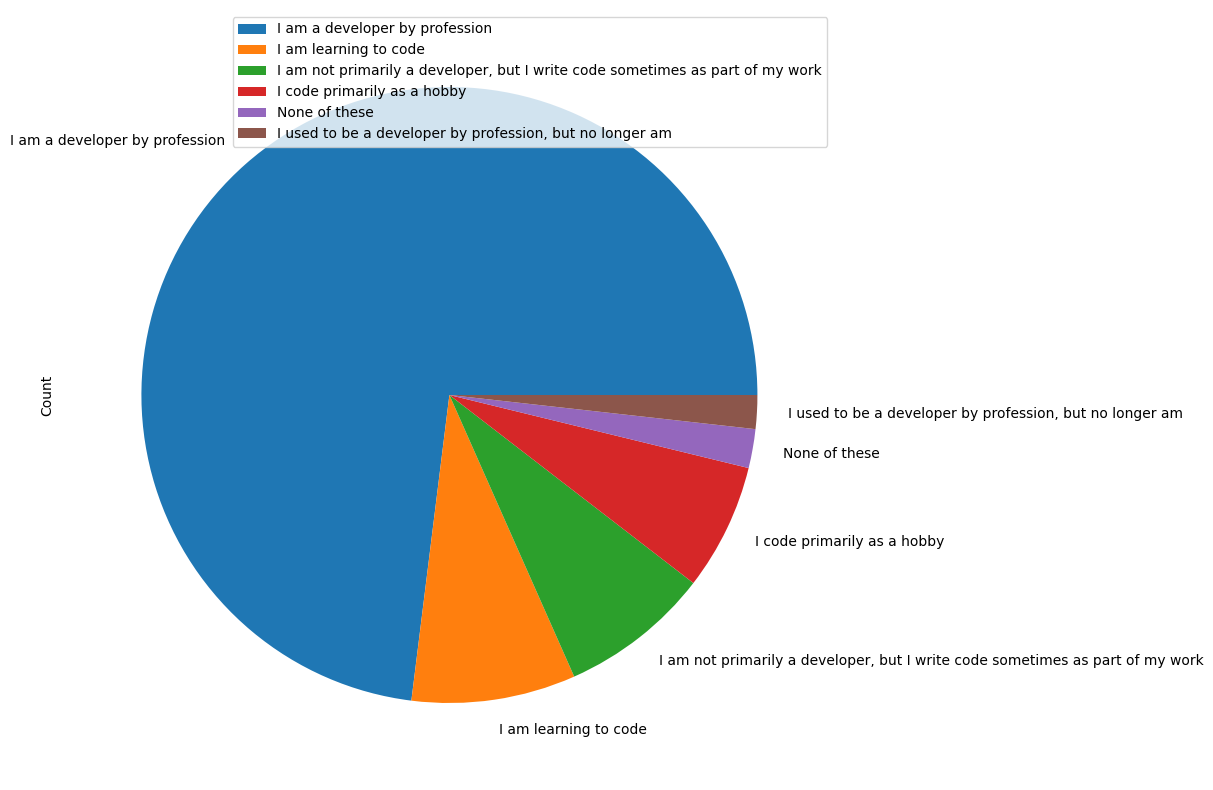

In [268]:
MB_df.plot.pie(y='Count', figsize=(10, 10))

# 1.3 MainBranch Values ανά χώρα

In [250]:
MB_values = country_grp['MainBranch'].value_counts()
MB_values

Country      MainBranch                                                                   
Afghanistan  I am a developer by profession                                                   43
             I code primarily as a hobby                                                      11
             I am learning to code                                                             7
             I am not primarily a developer, but I write code sometimes as part of my work     6
             I used to be a developer by profession, but no longer am                          2
                                                                                              ..
Zambia       I code primarily as a hobby                                                       1
Zimbabwe     I am a developer by profession                                                   17
             I am learning to code                                                             6
             I code primarily as a h

# 1.4 MainBranch ανά χώρα σε πίνακα (count, percent)

In [251]:
MB_values = country_grp['MainBranch'].value_counts()
MB = pd.concat([MB_values], axis='columns', sort=False)
MB_per = country_grp['MainBranch'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
MB_df_per = pd.concat([MB,MB_per], axis='columns', sort=False)
MB_df_per.columns = ['Count','Percent']
MB_df_per

Count Percent
Country     MainBranch                                                       
Afghanistan I am a developer by profession                         43   62.3%
            I code primarily as a hobby                            11   15.9%
            I am learning to code                                   7   10.1%
            I am not primarily a developer, but I write cod...      6    8.7%
            I used to be a developer by profession, but no ...      2    2.9%
...                                                               ...     ...
Zambia      I code primarily as a hobby                             1    5.0%
Zimbabwe    I am a developer by profession                         17   56.7%
            I am learning to code                                   6   20.0%
            I code primarily as a hobby                             4   13.3%
            I am not primarily a developer, but I write cod...      3   10.0%

[707 rows x 2 columns]

  ### 1.4.2 Παράδειγμα Germany

In [270]:
Germany = MB_df_per.loc['Germany'] 
Germany

,Count,Percent
MainBranch,,
I am a developer by profession,4047,75.0%
"I am not primarily a developer, but I write code sometimes as part of my work",583,10.8%
I code primarily as a hobby,412,7.6%
I am learning to code,259,4.8%
"I used to be a developer by profession, but no longer am",94,1.7%


### 1.4.3 Παράδειγμα Germany πίττα

<AxesSubplot:ylabel='Count'>

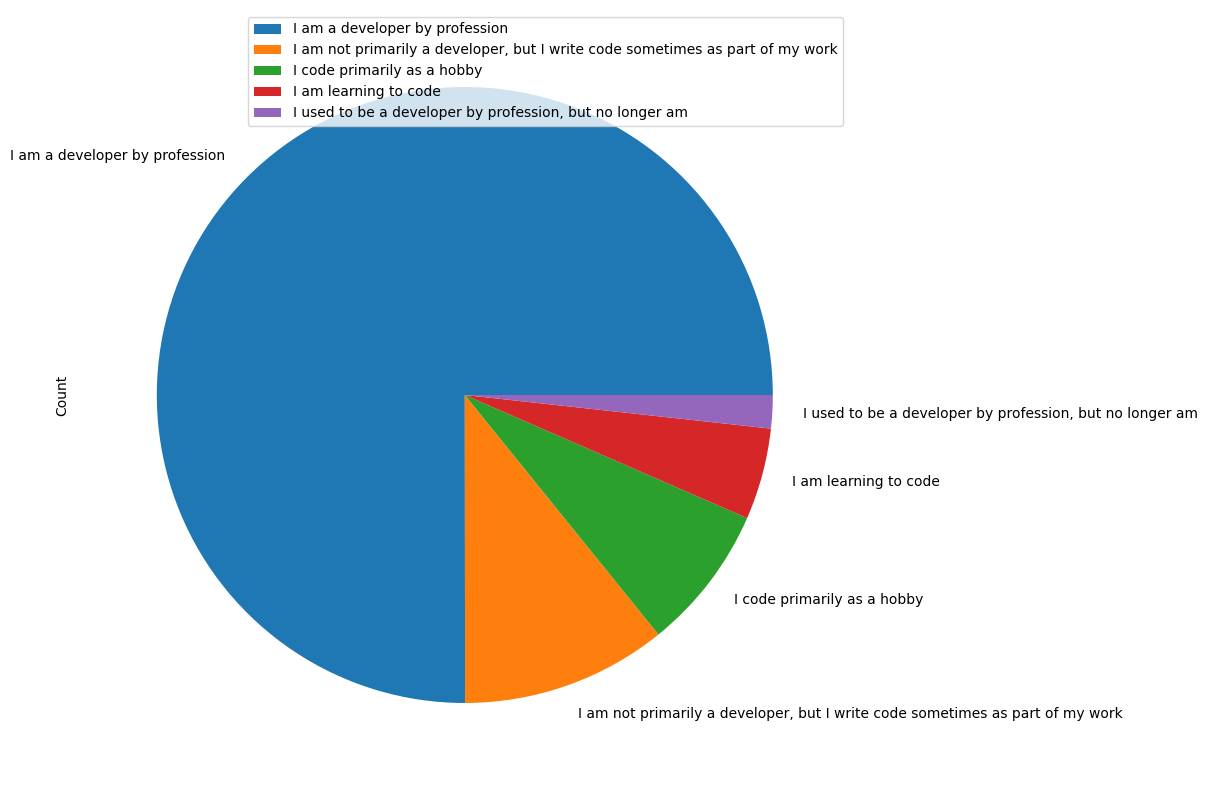

In [271]:
Germany.plot.pie(y='Count', figsize=(10, 10))

# 2.1 EdLevel συνολικές απαντήσεις - σε πίνακα
#### αριθμός απαντήσεων - count
#### συνολικό ποσοστό - percent

In [136]:
responders_EL = df['EdLevel'].value_counts()
responders_EL_per = df['EdLevel'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
EL_df = pd.concat([responders_EL, responders_EL_per], axis='columns', sort=False)
EL_df.columns = ['Count','Percent']
EL_df

,Count,Percent
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",30276,42.3%
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15486,21.6%
Some college/university study without earning a degree,9326,13.0%
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",7904,11.0%
"Associate degree (A.A., A.S., etc.)",2236,3.1%
"Other doctoral degree (Ph.D., Ed.D., etc.)",2169,3.0%
Primary/elementary school,1806,2.5%
Something else,1247,1.7%
"Professional degree (JD, MD, etc.)",1121,1.6%


# 2.2 EdLevel διάγραμμα απαντήσεων

<AxesSubplot:>

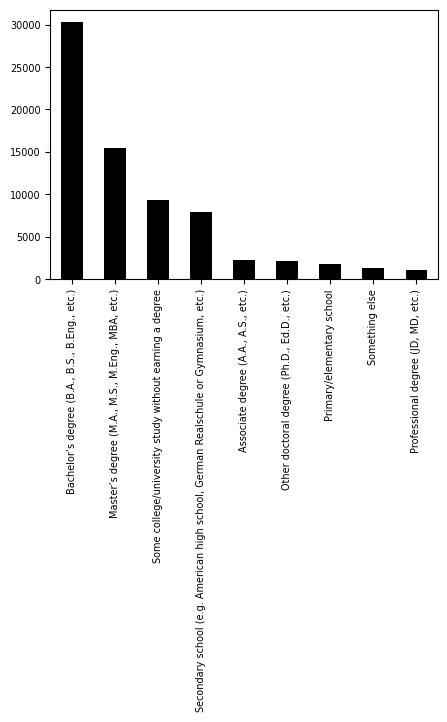

In [283]:
df['EdLevel'].value_counts().plot(kind="bar", figsize=(5,3.5), color="black", fontsize = (7))

# 2.3 Ομαδοποιημένο EdLevel ανά χώρα (%) - σε πίνακα

In [140]:
EL_values = country_grp['EdLevel'].value_counts()
EL = pd.concat([EL_values], axis='columns', sort=False)
EL_per = country_grp['EdLevel'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
EL_df_per= pd.concat([EL,EL_per], axis='columns', sort=False)
EL_df_per.columns = ['Count','Percent']
EL_df_per

Count Percent
Country     EdLevel                                                          
Afghanistan Bachelor’s degree (B.A., B.S., B.Eng., etc.)           26   39.4%
            Primary/elementary school                               9   13.6%
            Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         8   12.1%
            Some college/university study without earning a...      8   12.1%
            Secondary school (e.g. American high school, Ge...      6    9.1%
...                                                               ...     ...
Zimbabwe    Bachelor’s degree (B.A., B.S., B.Eng., etc.)           12   40.0%
            Some college/university study without earning a...     11   36.7%
            Secondary school (e.g. American high school, Ge...      5   16.7%
            Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         1    3.3%
            Primary/elementary school                               1    3.3%

[1137 rows x 2 columns]

### 2.3.2 Παράδειγμα Greece EdLevel σε γράφημα

<AxesSubplot:xlabel='EdLevel'>

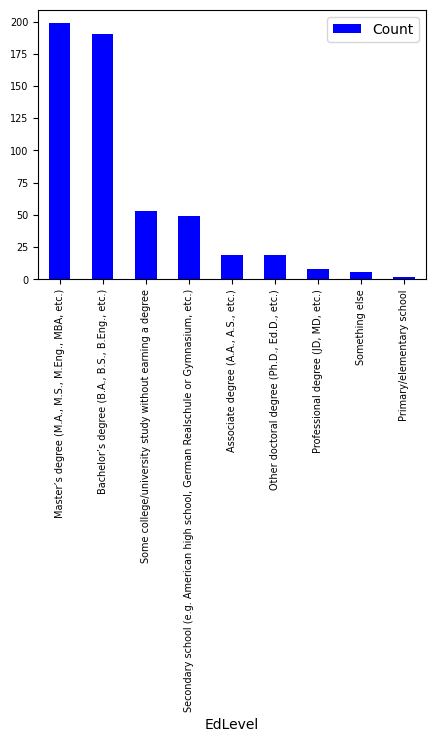

In [282]:
Greece = EL_df_per.loc['Greece'] 
Greece.plot(kind="bar", figsize=(5,3.5), color="blue", fontsize = (7))

# 3.1 LanguageHaveWorkedWith - φιλτράρισμα απαντήσεων

In [223]:
C = df['LanguageHaveWorkedWith'].str.contains('C;').sum()

In [224]:
Csharp = df['LanguageHaveWorkedWith'].str.contains('C#;').sum()

In [225]:
PHP = df['LanguageHaveWorkedWith'].str.contains('PHP;').sum()

In [226]:
Java = df['LanguageHaveWorkedWith'].str.contains('Java;').sum()

In [260]:
Javascript = df['LanguageHaveWorkedWith'].str.contains('JavaScript;').sum()

In [228]:
total = df['ResponseId'].value_counts().sum()

# 3.2 Πίνακας με τις τιμές LanguageHaveWorkedWith που θέλω σε πίνακα - συνολικές τιμές (count, percent)

In [229]:
d = {'': ['C', 'C#', 'PHP', 'Java', 'Javascript'],
    'Count': [C, Csharp, PHP, Java, Javascript],
    'Percentage (%)': [C*100/total , Csharp*100/total, PHP*100/total, Java*100/total, Javascript*100/total]}
lang_df = pd.DataFrame(data = d)
l = lang_df.set_index('')
np.round(l, decimals=2)

,Count,Percentage (%)
,,
C,14495,19.78
C#,19294,26.33
PHP,13415,18.31
Java,22511,30.72
Javascript,43493,59.36


# 3.3 LanguageHaveWorkedWith διάγραμμα με τις φιλτραρισμένες τιμές

<AxesSubplot:>

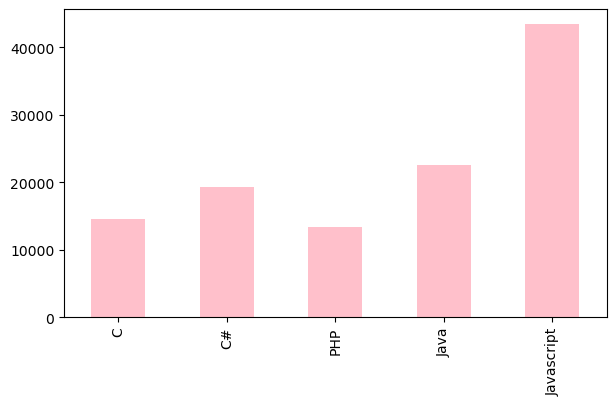

In [284]:
l['Count'].plot(kind="bar", figsize=(7,4), color="pink")

# 3.4 LanguageHaveWorkedWith ομαδοποιημένες οι τιμές που θέλω ανά χώρα

#### Πρώτα φιλτράρω ανά  χώρα το LanguageHaveWorkedWith και επιλέγω *όλες*  τις εγγραφές που περιέχουν τους χαρακτήρες 'C;' . Συγχονεύω σε στον πίνακα τις συνολικές απαντήσεις ανά χώρα - Country Responders με τις εγγραφές που περιέχουν τους χαρακτήρες 'C;'. Βρίσκω το ποσοστό των απαντήσεων % με C, επί του συνόλου και τοποθετώ και αυτό στον πίνακα. Μετονομάζω  τις στήλες και τέλος ταξινομώ με αλβ=φαβητική σειρά τον πίνακα. Το ίδιο επαναλαμβάνω για τους χαρακτήρες 'C#;', 'PHP;', 'Java;', 'Javascript;'.

In [239]:
country_responders = df['Country'].value_counts() 

In [285]:
country_uses_c = country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('C;').sum())
c_df = pd.concat([country_responders, country_uses_c], axis='columns', sort=False)
c_df['KnowsC(%)'] = 100*(c_df['LanguageHaveWorkedWith']/c_df['Country'])
c_df.columns = ['Country Responders','Knows C', 'Knows C(%)']
c_df.sort_index()

,Country Responders,Knows C,Knows C(%)
Afghanistan,69,21,30.434783
Albania,59,8,13.559322
Algeria,36,12,33.333333
Andorra,15,3,20.000000
Angola,12,3,25.000000
Antigua and Barbuda,2,0,0.000000
Argentina,521,61,11.708253
Armenia,93,6,6.451613
Australia,1462,268,18.331053
Austria,833,189,22.689076


# 3.5 Διάγραμμα των 10 πρώτων χωρών επί του συνόλου, που περιέχουν τις περισσότερες εγγραφές με τους χαρακτήρες 'C;'

<AxesSubplot:>

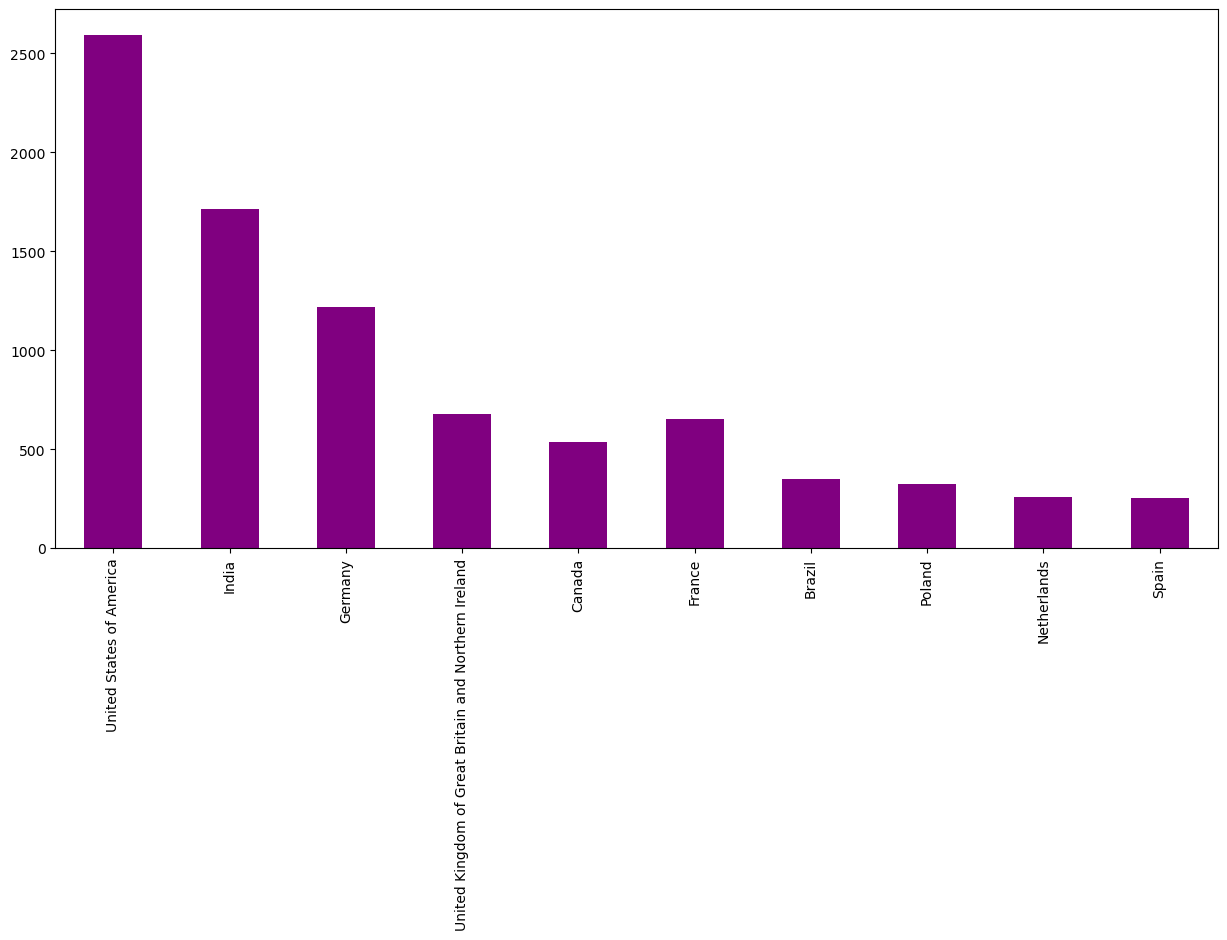

In [286]:
c_df['Knows C'].head(n=10).plot(kind="bar", figsize=(15,7), color="purple")

In [262]:
country_uses_PHP = country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('PHP;').sum())
PHP_df = pd.concat([country_responders, country_uses_PHP], axis='columns', sort=False)
PHP_df['KnowsPHP(%)'] = 100*(PHP_df['LanguageHaveWorkedWith']/PHP_df['Country'])
PHP_df.columns = ['Country Responders', 'Knows PHP', 'Knows PHP(%)']
#PHP_df.sort_index()

In [263]:
country_uses_csharp = country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('C#;').sum())
csharp_df = pd.concat([country_responders, country_uses_csharp], axis='columns', sort=False)
csharp_df['KnowsC#(%)'] = 100*(csharp_df['LanguageHaveWorkedWith']/csharp_df['Country'])
csharp_df.columns = ['Country Responders', 'Knows C#', 'Knows C#(%)']
#csharp_df.sort_index()

In [264]:
country_uses_Java = country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Java;').sum())
Java_df = pd.concat([country_responders, country_uses_Java], axis='columns', sort=False)
Java_df['KnowsJava(%)'] = 100*(Java_df['LanguageHaveWorkedWith']/Java_df['Country'])
Java_df.columns = ['Country Responders', 'Knows Java', 'Knows Java(%)']
#Java_df.sort_index()

In [265]:
country_uses_JS = country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('JavaScript;').sum())
JS_df= pd.concat([country_responders, country_uses_JS], axis='columns', sort=False)
JS_df['KnowsJS(%)'] = 100*(JS_df['LanguageHaveWorkedWith']/JS_df['Country'])
JS_df.columns = ['Country Responders', 'Knows JavaScript', 'Knows JavaScript(%)']
#JS_df.sort_index()

# 3.6 Οι τελικοί πίνακες που συγχωνεύουν τις επιλεγμένες γλώσσες προγραμματισμού ομαδοποιημένες ανά χώρα

## 3.6.1 το συνολικό ποσοστό ανά χώρα - percent (final_lang_per)

In [245]:
final_lang_count = pd.concat([country_responders, c_df['Knows C'], csharp_df['Knows C#'],JS_df['Knows JavaScript'],PHP_df['Knows PHP'], Java_df['Knows Java']], axis='columns', sort=False)
final_lang_count.columns = ['Country responders', 'C', 'C#', 'JavaScript','PHP', 'Java']


final_lang_per = pd.concat([country_responders, c_df['Knows C(%)'], csharp_df['Knows C#(%)'],JS_df['Knows JavaScript(%)'],PHP_df['Knows PHP(%)'], Java_df['Knows Java(%)']], axis='columns', sort=False)
final_lang_per.columns = ['Country responders', 'C(%)', 'C#(%)', 'JavaScript(%)','PHP(%)', 'Java(%)']

pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 180)

final_lang_per

,Country responders,C(%),C#(%),JavaScript(%),PHP(%),Java(%)
United States of America,13543,19.161190,29.395260,63.257772,13.084250,28.952226
India,6639,25.832204,15.137822,55.294472,16.071698,34.523272
Germany,5395,22.557924,26.746988,57.961075,19.277108,39.721965
United Kingdom of Great Britain and Northern Ireland,4190,16.133652,31.885442,61.742243,16.229117,24.701671
Canada,2490,21.445783,28.192771,62.449799,15.180723,28.915663
France,2328,28.049828,21.692440,63.187285,27.663230,35.438144
Brazil,2109,16.595543,21.147463,61.450925,18.587008,28.496918
Poland,1732,18.591224,29.099307,57.678984,17.494226,27.713626
Netherlands,1555,16.591640,32.540193,62.315113,23.344051,29.581994
Spain,1521,16.699540,21.959237,61.538462,23.274162,37.475345


## 3.6.2 τον συνολικό αριθμό ανά χώρα - count (final_lang_count), 

In [246]:
final_lang_count 

,Country responders,C,C#,JavaScript,PHP,Java
United States of America,13543,2595,3981,8567,1772,3921
India,6639,1715,1005,3671,1067,2292
Germany,5395,1217,1443,3127,1040,2143
United Kingdom of Great Britain and Northern Ireland,4190,676,1336,2587,680,1035
Canada,2490,534,702,1555,378,720
France,2328,653,505,1471,644,825
Brazil,2109,350,446,1296,392,601
Poland,1732,322,504,999,303,480
Netherlands,1555,258,506,969,363,460
Spain,1521,254,334,936,354,570


#  3.7 Διάγραμμα των 5 πρώτων σε αριθμό country responders επί του συνόλου, με τις επιλεγμένες γλώσσες προγραμματισμού

<AxesSubplot:>

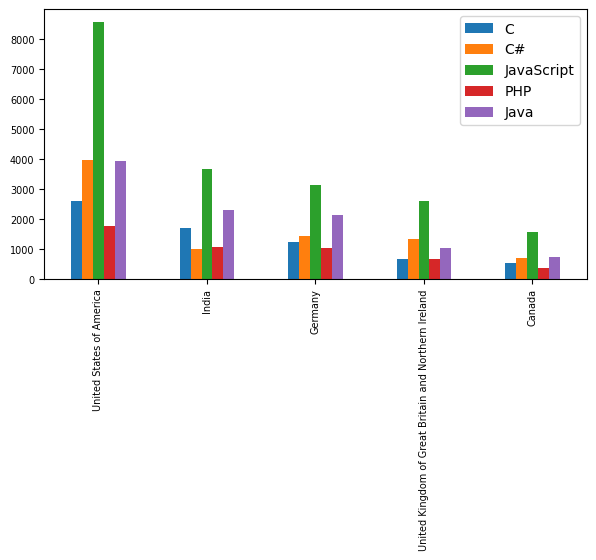

In [311]:
final_lang_count.head(n=5).plot(y=["C", "C#", 'JavaScript', 'PHP', 'Java'],kind="bar", figsize=(7, 3.5), fontsize =(7))